<a href="https://colab.research.google.com/github/thinkinchicken/food-sales-predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/drive/MyDrive/Colab Notebooks/01 Week 1: Python/sales_predictions.csv"
sales_predictions = pd.read_csv(file_path)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
#1) How many rows and columns?
sales_predictions.shape
#8523 rows and 12 columns

(8523, 12)

In [40]:
#2) What are the datatypes of each variable?
sales_predictions.info()
#Shows that datatypes are objects and floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [41]:
#3) Are there duplicates? If so, drop any duplicates.
sales_predictions.duplicated().any()
#Output says no duplicated data. 

False

In [42]:
#4) Identify missing values.
sales_predictions.info()
# Looks like there are a couple Null values in Item Weight and Outlet Size column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [43]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
#Find the range of Item_Weight Column to see how large of a range Item Weight goes across and how much it can vary
print(sales_predictions['Item_Weight'].min())
print(sales_predictions['Item_Weight'].max())
# I will in the NA values for the Item_Weight column with the mean since the range is not that large
sales_predictions['Item_Weight'] = sales_predictions['Item_Weight'].fillna(sales_predictions['Item_Weight'].mean())

4.555
21.35


In [44]:
#Checking if filling the NA values for item weight worked
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
#For the Outlet_Size column, I would like to check the range of Item_Outlet_Sales range to see if it's comparable to Outlet_Size
print(sales_predictions['Item_Outlet_Sales'].min())
print(sales_predictions['Item_Outlet_Sales'].max())
# I see that the Item Outlet Sales has a pretty broad range

33.29
13086.9648


In [46]:
#Checking the current distrubution and value counts of the Outlet sizes
sales_predictions['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [47]:
#Deciding to fill in the gaps within Outlet_Size as "Missing" so not to skew the data since it is a pretty good chunk that is missing. 
#Also realizing it is a string a simple mean fill or backfill or frontfill will work
sales_predictions['Outlet_Size'] = sales_predictions['Outlet_Size'].fillna('missing')
sales_predictions.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
#6) Confirm that there are no missing values after addressing them.
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [49]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
#Checking each individual column that hass an object datatype
sales_predictions['Item_Identifier'].value_counts()  #Good to go
sales_predictions['Item_Fat_Content'].value_counts() #Needs work
sales_predictions['Item_Type'].value_counts() #Good to go
sales_predictions['Outlet_Identifier'].value_counts() #Good to go
sales_predictions['Outlet_Type'].value_counts()  # Good to go

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [50]:
#Working on Item_Fat_Content column because there are inconsistencies
sales_predictions['Item_Fat_Content']= sales_predictions['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat': 'Low Fat'})
#Checking to see if it worked
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [51]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
integer_columns = sales_predictions.select_dtypes(include=['float64']).columns
print(integer_columns)
sales_predictions[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].describe()

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


Text(0, 0.5, 'Count')

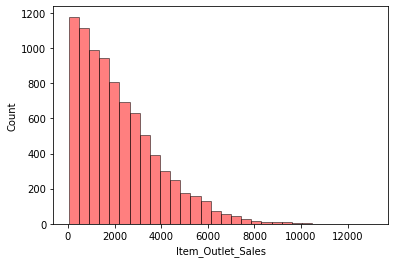

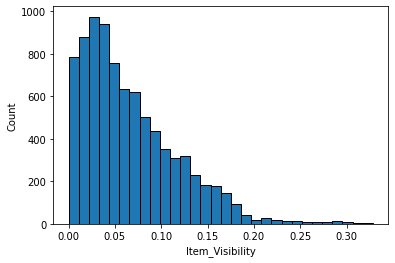

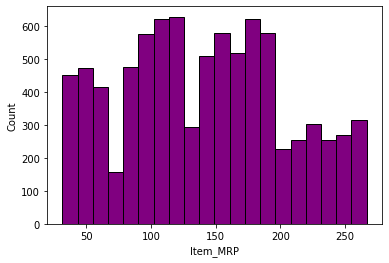

In [52]:
#Part 3 
##Let's try histograms of a couple of the columns and see what we get
#Checking the column names to see what the potential is to plot
sales_predictions.head()
#Deciding on Item Outlet Sales and Item Visibility and plotting into two different histograms. 
#Considering Item MRP as well to see what that may look like. Unsure of what MRP is
#Seems like there is a strong correlation between the two but will check later with heat map

fig1 = plt.figure()
plt.hist(sales_predictions['Item_Outlet_Sales'], bins = 30, edgecolor =  'black', alpha = 0.5, label = 'Item Sales', color = 'red')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
fig2 = plt.figure()
plt.hist(sales_predictions['Item_Visibility'], bins = 30, edgecolor = 'black',alpha =1, label = 'Item Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Count')
fig3 = plt.figure()
plt.hist(sales_predictions['Item_MRP'], bins = 20, edgecolor = 'black', label = 'Item MRP', color = 'purple')
plt.xlabel('Item_MRP')
plt.ylabel('Count')


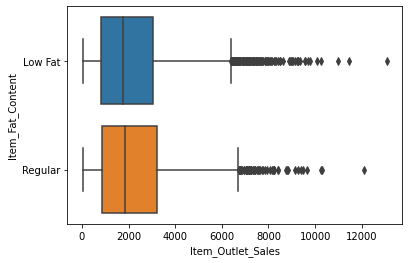

In [53]:
# Plotting box plots but checking column names first to see what our options are
sales_predictions.head()
#Let's check out Location Type, Item Type, Item Fat Content
#Plot of Item Fat Content and the distribution of sales for each
#Pretty equal distribution between Low Fat and Regular item types

sns.boxplot(x=sales_predictions['Item_Outlet_Sales'], y = sales_predictions['Item_Fat_Content']);


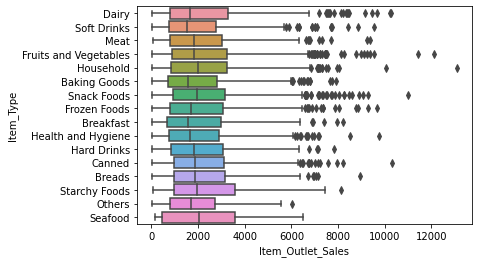

In [54]:
#Box plotting Item Type and sales distribution for each type of item
#No one food type seems like it stands out by a lot from the group
#There are some pretty big outliers in Baking Goods  and Friots and vegetables. 
sns.boxplot(x=sales_predictions['Item_Outlet_Sales'], y = sales_predictions['Item_Type']);

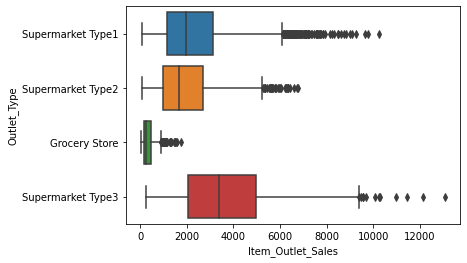

In [55]:
#Box plotting Location Type and Item sales for each
#Looks like the grocery store has the fewest item sales while the super market type 3 has the most. Super market Type 1 looks like it amy have a lot of outliers
sns.boxplot(x=sales_predictions['Item_Outlet_Sales'], y = sales_predictions['Outlet_Type']);


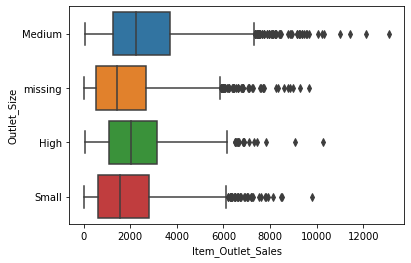

In [56]:
#Might be worth comparing the supermarket type sales and the outlet size sales too
#Taking a look, it is interesting to see that sales across the different sizes of outlet stores is within the same range. There are more outliers in the Medium store, and seemingly more sales in the medium stores
#but not that significant
sns.boxplot(x=sales_predictions['Item_Outlet_Sales'], y = sales_predictions['Outlet_Size']);

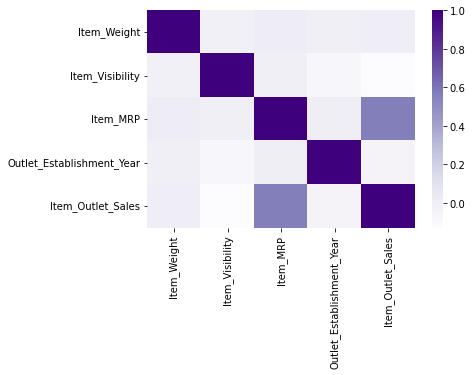

In [57]:
#In this case may be worth seeing if there is a correlation between size sales and supermarket type
corr = sales_predictions.corr()
sns.heatmap(corr, cmap = 'Purples');
#Interesting to see there is some correclation between Item _MRP and Item Outlet Sales. 
#Other interesting point is that although the histograms for Item visibility and Item Outlet Sales seem similar, there is not a strong correlation between the two. There is actually close to none. 


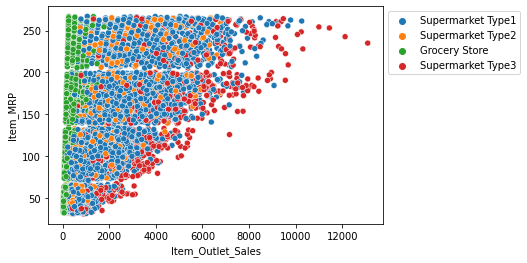

In [58]:
#Doing a scatter plot and then using color to see if sny categorical type column gives any insight to this correlation
sns.scatterplot(x = 'Item_Outlet_Sales', y = 'Item_MRP', data = sales_predictions, hue = 'Outlet_Type' )
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left');
#Outlet type Supermarket Type 3 looks promising for some correlation analysis

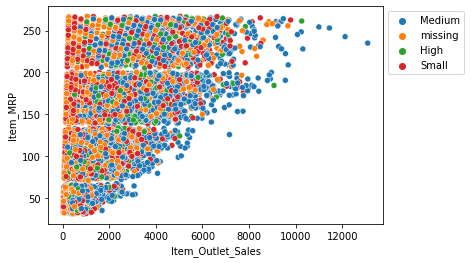

In [66]:
#checking to see if Outlet size has any similarities
#output shows that the general distribution is relatively similar but not as strong a correlation as we see in the scatterplot of the Outlet type
sns.scatterplot(x = 'Item_Outlet_Sales', y = 'Item_MRP', data = sales_predictions, hue = 'Outlet_Size' )
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left');

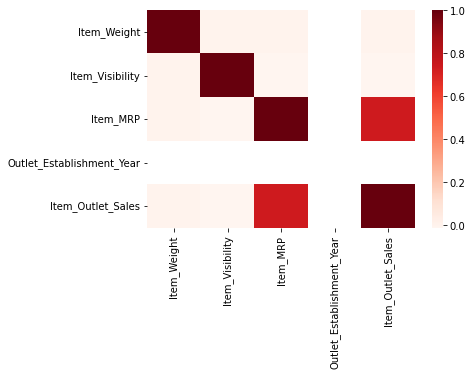

In [63]:
#Creating a filter for Supermarket type 3
#Plotting the correlation heat map and scatterplot for supermarket type 3 
#output once again shows strong correlation between MRP and Item Sales
type_3 = sales_predictions.loc[sales_predictions['Outlet_Type']== 'Supermarket Type3']
corr = type_3.corr()
sns.heatmap(corr, cmap = 'Reds');


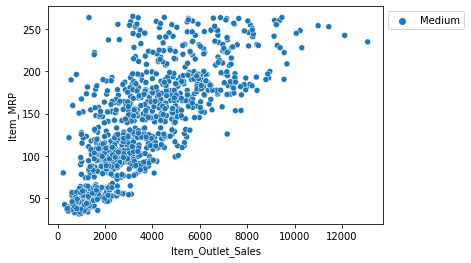

In [65]:
#Scatterplot of supermarket type 3 outlet sales and item MRP
#Some correlation shown
sns.scatterplot(x = 'Item_Outlet_Sales', y = 'Item_MRP', data = type_3)